# Titanic 

## 1. Importing the libraries

In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Exploratory Data Analysis

### 2.1 Importing the data

In [461]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

### 2.2 Analysing the data

In [462]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [463]:
holdout.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [464]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [465]:
holdout.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [466]:
train.shape

(891, 12)

In [467]:
holdout.shape

(418, 11)

In [468]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [469]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [470]:
total = train.isnull().sum().sort_values()
percent = total / train.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Embarked,2,0.002245


In [471]:
total = holdout.isnull().sum().sort_values()
percent = total / holdout.isnull().count().sort_values()
pd.concat([total,percent],axis = 1,keys = ['Count','%'])

,Count,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Embarked,0,0.000000
Fare,1,0.002392
Age,86,0.205742


### 2.3 Bar Charts for train data

#### 2.3.1 Sex

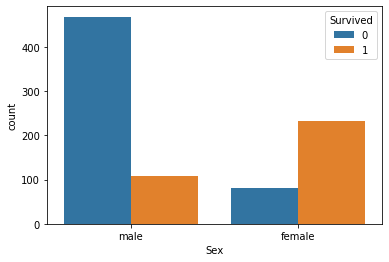

In [472]:
sns.countplot(x='Sex', data=train, hue='Survived')

#### 2.3.2 Pclass

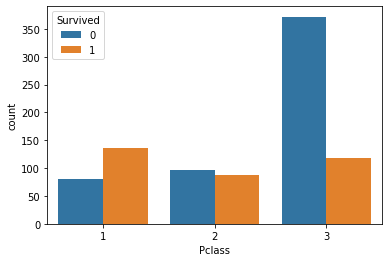

In [473]:
sns.countplot(x='Pclass', data=train, hue='Survived')

#### 2.3.3 SibSp

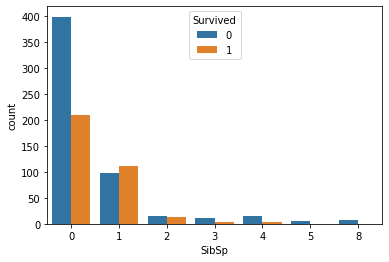

In [474]:
sns.countplot(x='SibSp', data=train, hue='Survived')

#### 2.3.4 Parch

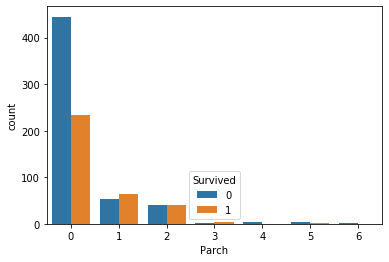

In [475]:
sns.countplot(x='Parch', data=train, hue='Survived')

#### 2.3.5 Fare

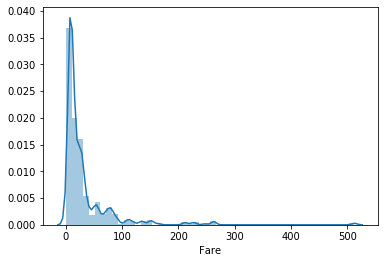

In [476]:
sns.distplot(train['Fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

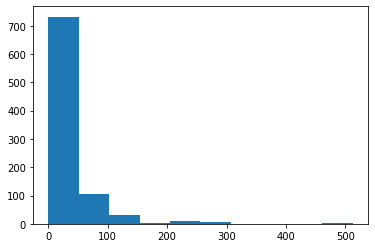

In [477]:
plt.hist(train['Fare'])

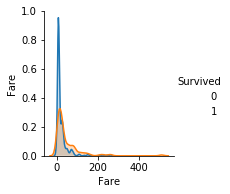

In [478]:
sns.pairplot(data = train, hue = 'Survived', vars = ['Fare'])

### 2.4 Studying Correlation using correlation matrix

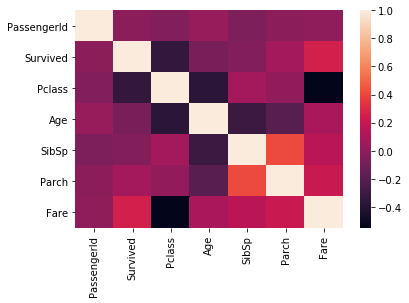

In [479]:
cor = train.corr()
sns.heatmap(cor)

## 3. Feature Engineering

In [480]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

### 3.1 Cabin

As Cabin contains a lot of null values ~77%, we will drop cabin

In [481]:
train = train.drop(['Cabin'], axis=1)
holdout = holdout.drop(['Cabin'], axis=1)

In [482]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [483]:
holdout.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

### 3.2 Age

In [484]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [485]:
train['Age'].median()

28.0

Replacing null values in Age by median

In [486]:
train['Age'].fillna(train['Age'].median(), inplace=True)
holdout['Age'].fillna(train['Age'].median(), inplace=True)

In [487]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [488]:
holdout.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [489]:
def process_age(df):
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [490]:
train = process_age(train)
train = create_dummies(train, 'Age_categories')

In [491]:
holdout = process_age(holdout)
holdout = create_dummies(holdout, 'Age_categories')

### 3.3 Embarked

In [492]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Replacing null values Embarked by 'S'

In [493]:
train['Embarked'].fillna('S', inplace=True)
holdout['Embarked'].fillna('S', inplace=True)

In [494]:
train.isnull().sum()

PassengerId                   0
Survived                      0
Pclass                        0
Name                          0
Sex                           0
Age                           0
SibSp                         0
Parch                         0
Ticket                        0
Fare                          0
Embarked                      0
Age_categories                0
Age_categories_Missing        0
Age_categories_Infant         0
Age_categories_Child          0
Age_categories_Teenager       0
Age_categories_Young Adult    0
Age_categories_Adult          0
Age_categories_Senior         0
dtype: int64

In [495]:
holdout.isnull().sum()

PassengerId                   0
Pclass                        0
Name                          0
Sex                           0
Age                           0
SibSp                         0
Parch                         0
Ticket                        0
Fare                          1
Embarked                      0
Age_categories                0
Age_categories_Missing        0
Age_categories_Infant         0
Age_categories_Child          0
Age_categories_Teenager       0
Age_categories_Young Adult    0
Age_categories_Adult          0
Age_categories_Senior         0
dtype: int64

In [496]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Embarked'] = le.fit_transform(train['Embarked'])

In [497]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,2,Young Adult,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,Adult,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,2,Young Adult,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,2,Young Adult,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,2,Young Adult,0,0,0,0,1,0,0


In [498]:
holdout['Embarked'] = le.transform(holdout['Embarked'])

### 3.4 Fare

In [499]:
holdout['Fare'].mean()

35.6271884892086

Replacing null values in Fare(holdout dataset) by median

In [500]:
holdout['Fare'].fillna(holdout['Fare'].mean(), inplace=True)

### 3.5 Sex

In [501]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

In [502]:
holdout['Sex'] = le.transform(holdout['Sex'])

In [503]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,Young Adult,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,Adult,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,Young Adult,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,Young Adult,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,Young Adult,0,0,0,0,1,0,0


### 3.6 Parch and SsibSp

In [504]:
def people_known(df):
    df['PeopleKnown'] = df['SibSp'] + df['Parch']
    return df

In [505]:
def is_alone(col):
    if col == 0:
        return 1
    else:
        return 0

In [506]:
train = people_known(train)
train['Alone'] = train['PeopleKnown'].apply(is_alone)

In [507]:
holdout = people_known(holdout)
holdout['Alone'] = holdout['PeopleKnown'].apply(is_alone)

In [508]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    int64   
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Embarked                    891 non-null    int64   
 11  Age_categories              891 non-null    category
 12  Age_categories_Missing      891 non-null    uint8   
 13  Age_categories_Infan

In [509]:
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 418 non-null    int64   
 1   Pclass                      418 non-null    int64   
 2   Name                        418 non-null    object  
 3   Sex                         418 non-null    int64   
 4   Age                         418 non-null    float64 
 5   SibSp                       418 non-null    int64   
 6   Parch                       418 non-null    int64   
 7   Ticket                      418 non-null    object  
 8   Fare                        418 non-null    float64 
 9   Embarked                    418 non-null    int64   
 10  Age_categories              418 non-null    category
 11  Age_categories_Missing      418 non-null    uint8   
 12  Age_categories_Infant       418 non-null    uint8   
 13  Age_categories_Child

## 4. Feature Selection

In [510]:
dropCols = ['PassengerId', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Age_categories', 'PeopleKnown']

In [511]:
y = train['Survived']
train.drop('Survived', axis=1, inplace=True)
X = train.drop(dropCols, axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pclass                      891 non-null    int64  
 1   Sex                         891 non-null    int64  
 2   Fare                        891 non-null    float64
 3   Embarked                    891 non-null    int64  
 4   Age_categories_Missing      891 non-null    uint8  
 5   Age_categories_Infant       891 non-null    uint8  
 6   Age_categories_Child        891 non-null    uint8  
 7   Age_categories_Teenager     891 non-null    uint8  
 8   Age_categories_Young Adult  891 non-null    uint8  
 9   Age_categories_Adult        891 non-null    uint8  
 10  Age_categories_Senior       891 non-null    uint8  
 11  Alone                       891 non-null    int64  
dtypes: float64(1), int64(4), uint8(7)
memory usage: 41.0 KB


In [512]:
PassengerId = holdout['PassengerId']
holdout.drop(dropCols, axis=1, inplace=True)
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pclass                      418 non-null    int64  
 1   Sex                         418 non-null    int64  
 2   Fare                        418 non-null    float64
 3   Embarked                    418 non-null    int64  
 4   Age_categories_Missing      418 non-null    uint8  
 5   Age_categories_Infant       418 non-null    uint8  
 6   Age_categories_Child        418 non-null    uint8  
 7   Age_categories_Teenager     418 non-null    uint8  
 8   Age_categories_Young Adult  418 non-null    uint8  
 9   Age_categories_Adult        418 non-null    uint8  
 10  Age_categories_Senior       418 non-null    uint8  
 11  Alone                       418 non-null    int64  
dtypes: float64(1), int64(4), uint8(7)
memory usage: 19.3 KB


## 5. Modelling

### K-Fold Cross Validation

In [514]:
from sklearn.model_selection import cross_val_score, KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scores = []
model_name = []

### Logistic Regression

In [520]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

sc = StandardScaler()
X_train = sc.fit_transform(X)
classifier = LogisticRegression()
score = cross_val_score(classifier, X_train, y, cv=k_fold, n_jobs=1, scoring = 'accuracy')
print(np.mean(score)*100)
scores.append(np.mean(score))
model_name.append("Logistic Regression")

79.91011235955055


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

### KNN

In [521]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(classifier, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("KNN")

73.39950062421973


### Decision tree

In [522]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Decision tree")

80.47066167290886


### Naive Bayees

In [523]:
from sklearn.naive_bayes import GaussianNB

scoring = 'accuracy'
score = cross_val_score(classifier, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Naive Bayees")

80.47191011235955


### Support Vector Machines

In [524]:
from sklearn.svm import SVC

classifier = SVC()
scoring = 'accuracy'
score = cross_val_score(classifier, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("SVM")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarni

76.20224719101124


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Random Forest Classifier

In [525]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("Random Forest")

81.14357053682895


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: F

### XGBoost

In [528]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(classifier, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(np.mean(score) * 100)
scores.append(np.mean(score))
model_name.append("XGBoost")

83.16354556803995


In [529]:
s = pd.DataFrame({'Model' : model_name,
              "Score" : scores  
              })
s

,Model,Score
0,Logistic Regression,0.799101
1,KNN,0.733995
2,Decision tree,0.804707
3,Naive Bayees,0.804719
4,SVM,0.762022
5,Random Forest,0.811436
6,XGBoost,0.831635


In [530]:
classifier = XGBClassifier() #Logistic Regression gave me a score of .78894 while svm gave me a score of .78947 on kaggle 
classifier.fit(X, y)
prediction = classifier.predict(holdout)
passenger = np.array(list(range(891, 891 + 418)))
submission = pd.DataFrame({
    "PassengerId" : PassengerId,
    "Survived" : prediction
})
submission.to_csv('Submission.csv', index = False)
print("CSV generated successfully")

CSV generated successfully
